# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


In [2]:
Type = 'Clustering'

<hr>

## B. Business Understanding


In [6]:
business_use_case = 'The business use case for this project is to support the marketing team in sending customized marketing emails to groups of customers who exhibit similar spending behaviors. The bank can tailor its marketing strategies to the preferences and behaviors of each group by using clustering to categorize its customers based on their spending patterns. With this data-driven strategy, the bank can connect with customers through relevant offers, increasing the likelihood of a response and fostering stronger relationships with them.'

In [7]:
business_expectations = 'The bank believes that grouping clients according to their spending patterns will increase the accuracy of its advertising campaigns. The marketing team can boost customer satisfaction and engagement rates by tailoring promotions to each consumer category based on their purchasing patterns. The bank also anticipates that knowing expenditure trends would make it easier to spot high-value clients and possible cross-selling opportunities, which will improve the efficiency of marketing resource allocation and eventually boost income.'

<hr>

## C. Data Understanding


### C.0 Import Packages

In [8]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# Pandas for data manipulation and analysis
import numpy as np

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

### C.1   Load Datasets

In [9]:
# Load the cleaned transaction data from a CSV file into a DataFrame
df=pd.read_csv('transaction_data_cleaned.csv')

<hr>

### C.2   Data Exploration

In [10]:
# Display a summary of the DataFrame, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232877 entries, 0 to 232876
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   cc_num                           232877 non-null  int64  
 1   acct_num                         232877 non-null  int64  
 2   trans_num                        232877 non-null  object 
 3   category                         232877 non-null  object 
 4   amt                              232877 non-null  float64
 5   is_fraud                         232877 non-null  float64
 6   merchant                         232877 non-null  object 
 7   merch_lat                        232877 non-null  float64
 8   merch_long                       232877 non-null  float64
 9   year                             232877 non-null  int64  
 10  month                            232877 non-null  int64  
 11  day                              232877 non-null  int64  
 12  ho

> Insights: Key columns include category-specific spending features (e.g., category_Entertainment_spending, category_Essentials_spending), as well as aggregated spending metrics like total_spending_per_customer and avg_transaction_per_customer. These columns provide valuable insights into customer spending behaviors, supporting clustering analysis for targeted marketing.

In [11]:
# Generate summary statistics for the numerical columns in the DataFrame
df.describe()

,cc_num,acct_num,amt,is_fraud,merch_lat,merch_long,year,month,day,hour,total_spending_per_customer,avg_transaction_per_customer,transaction_count_per_customer,category_Entertainment_spending,category_Essentials_spending,category_Home_Family_spending,category_Shopping_spending,category_Wellness_spending
count,2.328770e+05,2.328770e+05,232877.000000,232877.000000,232877.000000,232877.000000,232877.0,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000,232877.000000
mean,3.990954e+17,4.880197e+11,60.434561,0.002353,36.874854,-94.235975,2022.0,7.212430,15.946397,9.838481,79792.154555,60.434561,1326.256818,14286.784790,21041.726192,13573.332729,22309.921665,8580.389178
std,1.268996e+18,2.712414e+11,175.844323,0.048453,5.480419,18.152690,0.0,3.390874,8.823416,6.180261,28143.982915,8.024956,451.401431,6406.658377,7303.787198,6154.561306,8310.471323,3618.295672
min,6.042928e+10,2.348758e+09,1.000000,0.000000,18.703211,-156.093208,2022.0,1.000000,1.000000,0.000000,17510.070000,47.691844,358.000000,1890.060000,4047.690000,1441.410000,3268.860000,830.950000
25%,2.131344e+14,2.832819e+11,8.150000,0.000000,33.570624,-105.676382,2022.0,4.000000,8.000000,5.000000,61676.660000,55.720961,1074.000000,10713.950000,16217.840000,9499.840000,16865.930000,6241.830000
50%,3.554744e+15,4.912279e+11,38.850000,0.000000,36.979008,-91.103996,2022.0,7.000000,16.000000,9.000000,83676.370000,59.138486,1432.000000,13956.080000,22447.790000,13588.040000,23075.590000,8612.240000
75%,4.696905e+15,7.098955e+11,70.660000,0.000000,40.737583,-80.471864,2022.0,10.000000,24.000000,14.000000,101418.680000,63.201899,1790.000000,17239.280000,27229.760000,16955.360000,28247.100000,10512.680000
max,4.813089e+18,9.993899e+11,25159.920000,1.000000,62.629747,-69.191769,2022.0,12.000000,31.000000,23.000000,139655.050000,99.082634,1795.000000,41818.930000,32736.800000,45451.090000,38268.380000,18024.510000


> Insights: The summary statistics reveal that total_spending_per_customer varies widely, with an average of about 79,792.15 and a maximum of 139,655.05, indicating some customers are significantly higher spenders, which could make them ideal targets for premium offers. transaction_count_per_customer also shows a broad range, with an average of 1,326.26 and a peak of 1,795, suggesting different levels of engagement, where customers with frequent transactions might be interested in loyalty programs or purchase incentives. Additionally, Home & Family Spending averages around 13,573.33 but reaches up to 45,451.09, pointing to a segment that likely has household-related needs, making them good candidates for targeted promotions on family or home products. These spending patterns form a strong foundation for clustering, allowing the marketing team to tailor strategies to specific customer behaviors.

<hr>

### C.3 Explore Variables of Interest


#### C.3.a Feature "total_spending_per_customer"

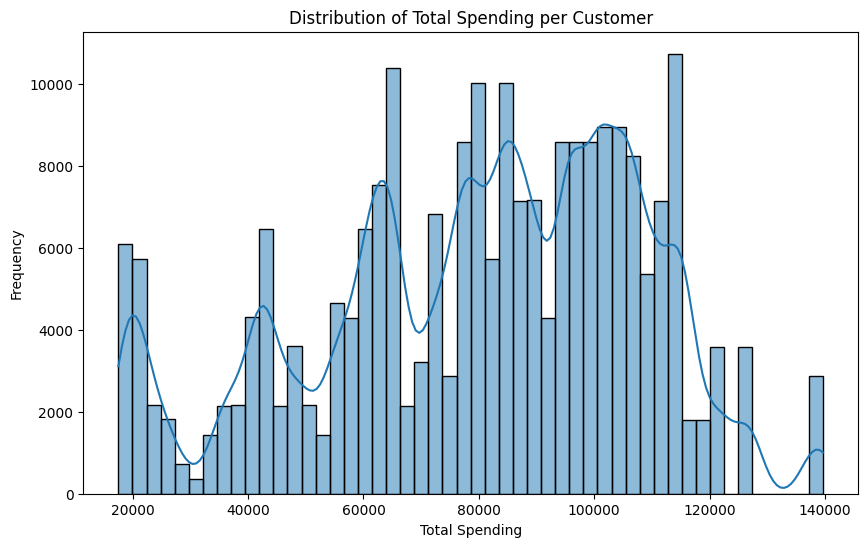

In [12]:
# Plot the distribution of total spending per customer
plt.figure(figsize=(10, 6))
sns.histplot(df['total_spending_per_customer'], bins=50, kde=True)
plt.title("Distribution of Total Spending per Customer")
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.show()

> Insights: The distribution of total_spending_per_customer appears multi-modal, with several peaks around different spending ranges. This suggests there are distinct groups of customers with different spending behaviors. The distribution shows a notable presence of customers spending between $20,000 and $140,000. This spread indicates a wide range of spending habits, potentially spanning low, medium, and high spenders. The tail on the right side indicates a smaller group of high-value customers who spend significantly more than the majority, suggesting opportunities for targeted marketing for these high spenders.

> Considerations: Given the multi-modal distribution, the amt_binned feature, which categorizes customers into spending levels (e.g., Very Low, Low, Medium, High, Very High), is useful for segmenting customers based on their spending behaviors. This segmentation allows for further analysis and targeted marketing strategies, enabling a more nuanced approach to addressing different customer spending habits. The varied distribution of spending amounts can support the clustering approach, as it indicates natural groupings within the data. However, the clustering algorithm should be chosen carefully to capture these distinct patterns (e.g., using K-Means with an optimal k determined by the elbow method). If total_spending_per_customer is used as a feature in clustering, it’s crucial to scale it along with other features to prevent dominance over other variables due to its larger numeric range.

> Issues found: The small cluster of customers on the far right (around $120,000 and above) may represent outliers or customers with unusually high spending. These outliers could skew the clustering process or affect the segmentation if not managed properly. The non-normal, multi-modal distribution may impact certain analyses or algorithms that assume a normal distribution. If this is a concern, consider transformations or alternative methods that don’t assume normality. The large spread in spending values suggests that a single threshold or binning method may not effectively capture customer segments. It may be necessary to define custom spending levels to align with observed spending peaks.

#### C.3.b Feature "avg_transaction_per_customer"

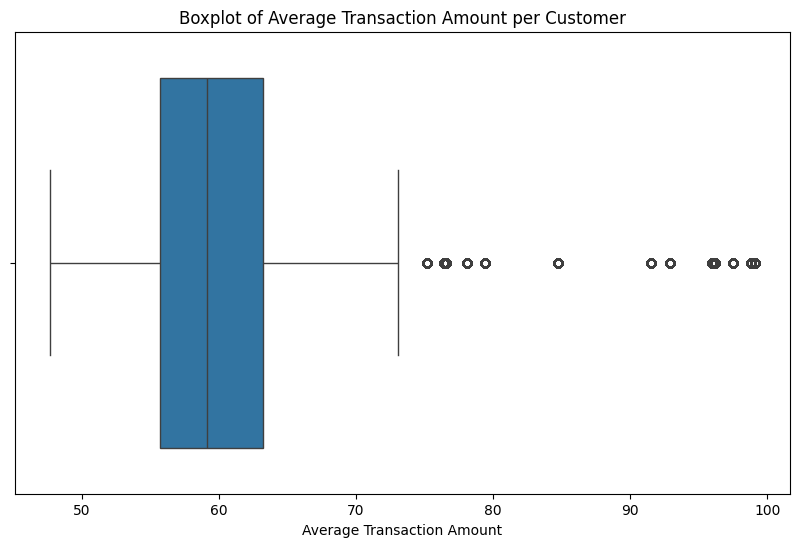

In [13]:
# Plot the distribution of average transaction amount per customer
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['avg_transaction_per_customer'])
plt.title("Boxplot of Average Transaction Amount per Customer")
plt.xlabel("Average Transaction Amount")
plt.show()

> Insights: The boxplot shows that most customers' average transaction amounts are clustered around a narrow range, with the median close to $60. This suggests that for the majority of customers, their average transaction size is consistent and doesn’t vary much. There are several outliers with average transaction amounts above the upper whisker, reaching up to approximately $100. These outliers represent customers who have significantly higher average transaction sizes compared to the general customer base. The interquartile range (IQR) is quite narrow, indicating that most customers' average transaction amounts are fairly close to each other, without much variation within the main group.

> Considerations: The presence of outliers with high average transaction amounts could signify a valuable customer segment. These customers may warrant special attention or targeted marketing strategies due to their tendency to spend more on average per transaction. Since most customers are clustered around a specific range, the avg_transaction_per_customer feature might not contribute significantly to distinguishing clusters for the majority of customers. However, it could help identify a small subset of high-value customers (the outliers). If using this variable in clustering, it’s essential to scale it along with other features to avoid the outliers disproportionately influencing the clustering results.

> Issues found: The boxplot reveals a few outliers with higher average transaction amounts. While these outliers could represent high-value customers, they might skew clustering results if not handled carefully. You may want to experiment with removing or capping these outliers to see if it improves clustering effectiveness. The narrow IQR suggests that this feature may have limited impact in differentiating most customers. It may be less useful for clustering unless you focus specifically on high-value outliers or combine it with other features to improve segmentation. Given that the average transaction amount is consistent for most customers, this feature might overlap with other spending metrics, such as total_spending_per_customer. You might consider whether both features are needed, as one may provide sufficient information for clustering.

#### C.3.c Feature "category_Essentials_spending"

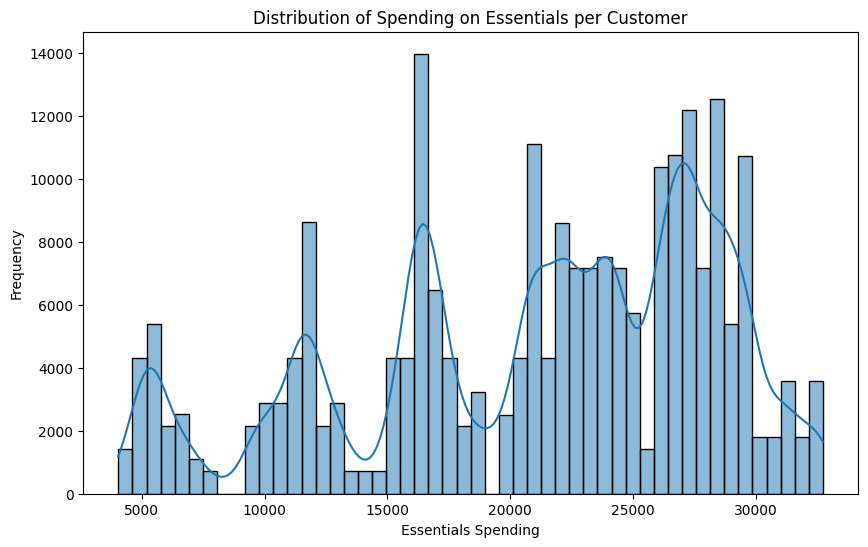

In [14]:
# Plot distribution of spending on Essentials category
plt.figure(figsize=(10, 6))
sns.histplot(df['category_Essentials_spending'], bins=50, kde=True)
plt.title("Distribution of Spending on Essentials per Customer")
plt.xlabel("Essentials Spending")
plt.ylabel("Frequency")
plt.show()

> Insights: The distribution of spending on essentials shows multiple peaks, indicating that there are distinct spending patterns within the customer base. This suggests that some customers spend significantly more on essentials than others, and they likely fall into separate spending groups. There are notable peaks around the $5,000, $15,000, and $25,000 ranges, indicating that a large portion of customers have spending habits concentrated around these values. The right side of the distribution extends up to around $30,000, showing a smaller group of high spenders on essentials. These customers might prioritize essential items and could represent a valuable segment for marketing campaigns focused on essential products.

> Considerations: Given the multi-modal nature of essentials spending, the amt_binned feature (which categorizes overall spending into levels like Very Low, Low, Medium, High, and Very High) can help segment customers for further analysis. This segmentation enables more tailored marketing strategies, particularly for essentials-focused promotions, by identifying different spending habits among customers. This variable could be very informative for clustering, as it shows clear variations in spending behaviors. Including category_Essentials_spending in your clustering algorithm may help in differentiating customers with different levels of spending on essential items. High spenders on essentials might be more consistent or loyal customers, as essentials spending typically reflects ongoing or frequent purchases. This could inform retention strategies targeting these customers.

> Issues found: The multi-modal distribution with several peaks indicates varying behaviors within this single variable, which could complicate clustering if not scaled or treated carefully. It’s important to ensure the clustering algorithm captures these variations accurately. Since essentials are likely a core part of overall spending, this feature may be somewhat correlated with total_spending_per_customer. If both are used in clustering, there could be redundancy unless carefully assessed. The right tail of the distribution may include some outliers or high-spending customers. While these outliers could represent a valuable segment, they might also skew clustering if not handled carefully, so you may want to consider scaling or checking for extreme values.

<hr>

## D. Feature Selection


In [15]:
feature_selection_executive_summary = 'The feature selection process aimed to capture key aspects of customer spending behavior that are critical for effective clustering. Features like total spending, average transaction amount, and transaction count were included to provide insights into overall spending levels and transaction frequency, which help distinguish customer segments. Additionally, category-specific spending features, such as entertainment, essentials, home and family, shopping, and wellness spending, were selected to offer a detailed view of customer preferences. This approach enabled the identification of well-defined customer profiles, enhancing the segmentation process for more targeted marketing and personalized services.'

> Rationale: The selected features list was created to capture the various dimensions of customer spending behavior that are crucial for effective clustering. By including total_spending_per_customer, avg_transaction_per_customer, and transaction_count_per_customer, we focus on overall spending patterns and transaction frequency, which are fundamental to differentiating customer groups. The other features, like category_Entertainment_spending, category_Essentials_spending, category_Home_Family_spending, category_Shopping_spending, and category_Wellness_spending, represent specific spending categories. These features help provide a more detailed understanding of customer preferences, enabling the identification of distinct spending profiles.

In [16]:
features_list = ['total_spending_per_customer', 'avg_transaction_per_customer', 'transaction_count_per_customer', 
                'category_Entertainment_spending', 'category_Essentials_spending', 'category_Home_Family_spending',
                'category_Shopping_spending', 'category_Wellness_spending']

> Results: The chosen features enriched the clustering process by providing diverse insights into each customer's behavior. Including both general spending patterns and category-specific spending helped to form well-defined clusters that represent different types of customers, such as those who spend primarily on essentials or those with higher expenditure on entertainment or wellness. This multi-faceted approach resulted in more meaningful customer segmentation, allowing for tailored marketing strategies and better understanding of customer needs.

<hr>

## E. Data Preparation

In [17]:
data_preparation_executive_summary = 'The data preparation phase involved selecting key features for clustering and applying scaling to normalize the data. We began by extracting a set of features that provide insight into customer behavior, such as total spending, average transaction per customer, and spending across various categories like entertainment, essentials, shopping, wellness, and more. To ensure the data was appropriately scaled and less sensitive to outliers, we used the RobustScaler to standardize the features. This approach minimized the influence of extreme values, improving the clustering performance and enhancing the model\'s ability to create meaningful and balanced customer segments.'

### E.1 Feature Selection for Clustering Analysis



> Rationale: The assignment of X = df[features_list] is aimed at creating a dataset specifically tailored for clustering by selecting only the most relevant features from the original dataframe. By using features_list, we extract the features that encapsulate key dimensions of customer spending behavior, such as total spending, transaction frequency, and category-specific spending. This selection is crucial as it helps in reducing noise and ensures that only the features most pertinent to the clustering analysis are used, which leads to better performance and interpretability of the model.

In [18]:
X = df[features_list]

> Results: By extracting the features in features_list, we created a new dataset (X) that was optimized for clustering. This dataset allowed the clustering algorithm to focus on the most impactful variables related to customer spending behavior. As a result, the clustering model generated more distinct and interpretable clusters, effectively grouping customers with similar patterns. This streamlined approach ensured that the clustering outcomes were driven by well-defined, relevant features, ultimately improving the quality of insights for marketing strategies or targeted interventions.

<hr>

### E.2 Feature Scaling to Prepare Data for Clustering Analysis



> Rationale: In order to prepare the dataset for clustering, scaling the features was crucial. The use of RobustScaler was specifically chosen because of its ability to minimize the influence of outliers, which are common in financial data. Unlike other scalers such as StandardScaler, which may be heavily influenced by extreme values, RobustScaler scales the data based on the median and interquartile range. This approach is particularly helpful in clustering, where extreme outliers can significantly distort distance-based clustering algorithms like K-Means.

In [19]:
from sklearn.preprocessing import RobustScaler

# Scale features using RobustScaler to minimize the effect of outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

> Results: The features were successfully scaled using the RobustScaler, resulting in a more normalized dataset that is less affected by extreme values. This transformation ensured that all features are on a similar scale, making clustering algorithms perform more efficiently and accurately. Consequently, the clustering process can better identify patterns and form distinct groups among customers based on their spending behaviors, leading to more reliable customer segmentation and actionable insights.

<hr>

## F. Determining the Optimal Number of Clusters Using the Elbow Method

In [20]:
optimal_number_of_clusters_executive_summary = 'The Elbow Method was used to determine the optimal number of clusters for the K-Means clustering model. By plotting the sum of squared distances (inertia) for different numbers of clusters, we identified the point where the reduction in inertia starts to level off, forming an "elbow" shape. In this analysis, the elbow was found around k=4, indicating that four clusters provide a suitable balance between compactness and model simplicity. Choosing four clusters allows us to effectively capture the main groupings in the data while avoiding overfitting, thus providing meaningful and interpretable customer segments for subsequent analysis.'

> Rationale: The Elbow Method is used to determine the optimal number of clusters for K-means clustering by evaluating the sum of squared distances (inertia) between data points and their assigned cluster centers for different values of k. The purpose of this analysis is to identify a point at which adding more clusters yields diminishing returns in terms of reduced inertia, often referred to as the "elbow point." By selecting this point, we aim to ensure a balance between simplicity and precision in the clustering model.

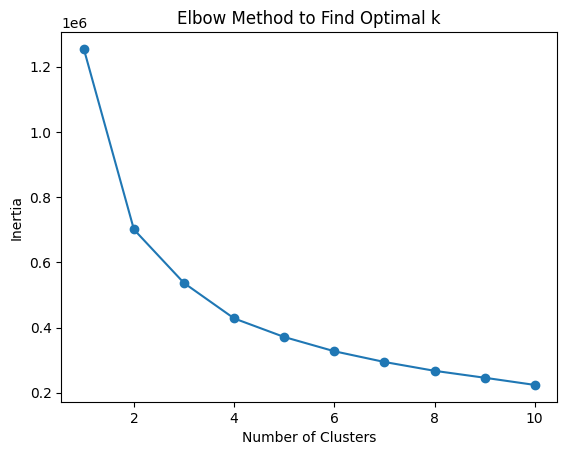

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia to find the elbow point
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

> Results: The Elbow Method plot shows that inertia significantly decreases as the number of clusters increases, particularly between k = 1 and k = 4. Beyond k = 4, the rate of reduction becomes less steep, indicating diminishing returns. Based on this visualization, the "elbow point" appears to be at k = 4, suggesting that this is the optimal number of clusters for our data. This selection aims to achieve effective clustering while avoiding unnecessary complexity.

<hr>

## G. Train Machine Learning Model

In [22]:
train_model_executive_summary = 'The K-Means clustering approach was employed to segment customers based on spending behaviors and preferences. The optimal number of clusters was determined to be 4, leading to the identification of distinct customer segments with varied spending patterns. Principal Component Analysis (PCA) was used for dimensionality reduction, allowing for a visual representation of the clusters in two dimensions, which helped to evaluate cluster separation effectively.\n\nCluster analysis included calculating average spending, transaction count, and spending across different categories for each cluster. The clusters were labeled descriptively based on their key characteristics, such as "High Overall Spenders," "Frequent Shoppers on Essentials and Retail," "Moderate Spenders on Essentials and Family Needs," and "Low-Income or Minimal Spenders." Visualizations such as scatter plots, box plots, heatmaps, and bar plots provided a detailed understanding of spending patterns across these clusters. The silhouette score of 0.33 indicated a moderate level of separation between clusters, validating the segmentation to some extent.\n\nFurther analysis included calculating centroids for each cluster to identify typical values across features, providing deeper insight into customer characteristics. This clustering approach helped uncover meaningful segments that can be targeted for more personalized marketing strategies and improved customer relationship management.'

### G.1 Train K-Means Model

> Rationale: The purpose of fitting the K-Means model with an optimal number of clusters is to segment customers into groups that exhibit similar spending behaviors. Using the pre-determined optimal number of clusters (k_optimal = 4), we apply the K-Means algorithm to assign each data point to one of these clusters. By setting random_state=42, we ensure the consistency of results across multiple runs, which helps maintain reproducibility in our analysis.

In [23]:
from sklearn.cluster import KMeans

# Set the optimal number of clusters
k_optimal = 4

# Fit the K-Means model with optimal k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

<hr>

### G.2 Evaluating Cluster Quality with Silhouette Plot

> Rationale: The silhouette score and silhouette plot were used to evaluate the quality of clustering with k=4. The silhouette score provides a measure of how well-separated the clusters are, with a value between -1 and 1. A higher silhouette score indicates that the clusters are distinct and well-defined. Additionally, the silhouette plot was employed to visualize how each data point fits within its respective cluster. By plotting silhouette values for each cluster, it becomes evident whether any of the clusters have negative silhouette values, indicating potential overlaps or poorly formed boundaries.

Silhouette Score: 0.32874279306826415


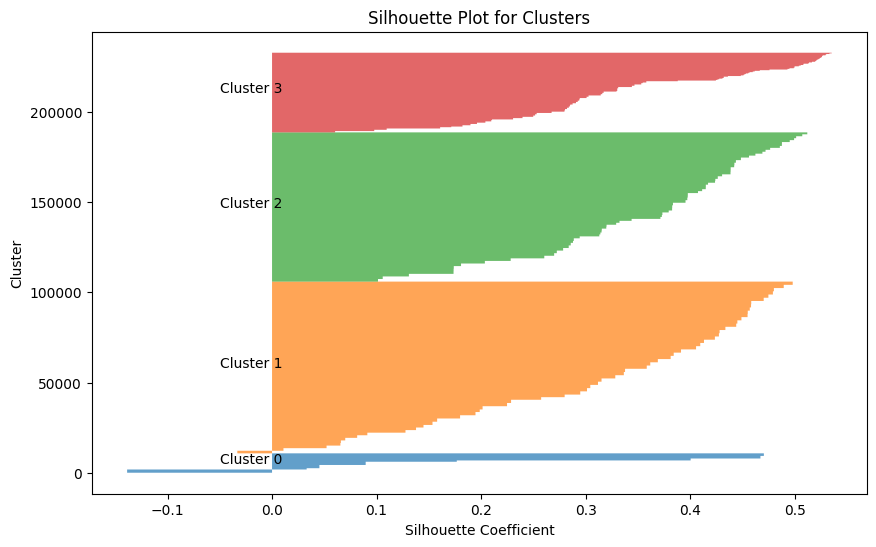

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Calculate silhouette score for the selected number of clusters
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Silhouette plot for the selected number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

# Plotting silhouette values for each cluster
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(4):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), f'Cluster {i}')
    y_lower = y_upper

plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot for Clusters')
plt.show()

> Results: The silhouette score for the clustering result was 0.328, suggesting that the clusters are moderately well-separated, but not perfectly distinct. The silhouette plot provides a more detailed visual representation of the clustering structure, showing the range of silhouette values for each cluster. The widths of each section indicate the cohesion within clusters, and the relatively broad spread in some clusters suggests variability in how well points fit within each cluster. These insights indicate that while some groups are distinct, there may be room for improvement in clustering, perhaps by tuning the number of clusters or scaling parameters.

<hr>

### G.3 Visualizing Customer Clusters Using PCA for Dimensionality Reduction








> Rationale: The PCA visualization aims to represent high-dimensional customer data in a two-dimensional space for easier interpretation of the clustering results. By applying Principal Component Analysis (PCA) with two components, the dataset's dimensionality is reduced, allowing us to visualize the spread and separability of clusters effectively. Using PCA helps identify patterns among clusters, facilitating an understanding of customer segments based on their financial behavior. The color bar, with specific cluster labels, further aids in distinguishing the different clusters formed by the K-Means algorithm.

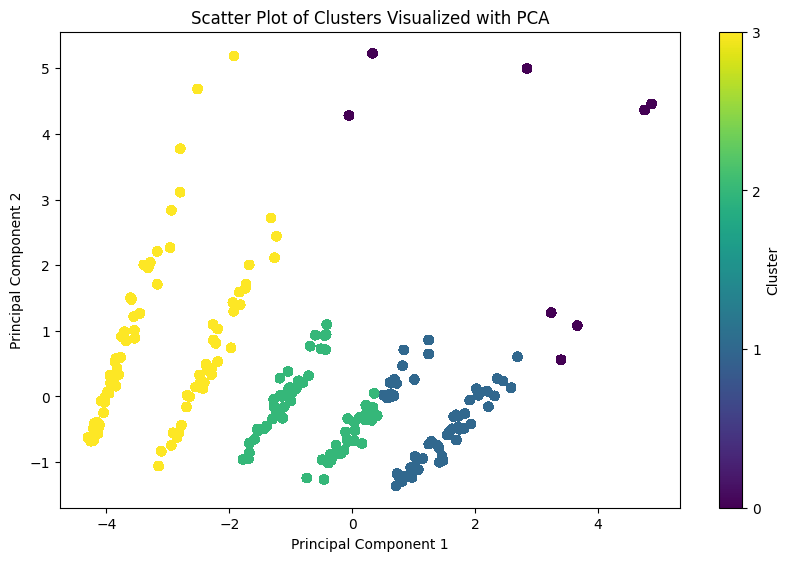

In [25]:
# PCA visualization of clusters
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality for visualization (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Clusters Visualized with PCA')
plt.subplots_adjust(bottom=0.2)

# Create a color bar with discrete labels
colorbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3])  # Set discrete ticks
colorbar.set_label('Cluster')
colorbar.set_ticklabels(['0', '1', '2', '3'])  # Set specific labels for each cluster

plt.show()

> Results: The scatter plot effectively visualizes four clusters of customers based on their spending behaviors, as represented by two principal components. The visualization shows distinct groupings of data points, with each color representing a different cluster. This clustering pattern indicates that the customer segments have unique attributes, such as spending levels and spending categories, which are well captured by the clustering algorithm. This visual representation helps the marketing team understand customer segments and provides a foundation for designing targeted strategies based on distinct customer profiles.

<hr>

### G.4 Cluster Analysis of Customer Spending Behavior

> Rationale: The goal of analyzing the clusters was to identify key spending patterns among different customer groups. By calculating average values for each feature within each cluster, we gained insights into the characteristics of each group. This analysis involved examining features such as total spending per customer, average transaction amount, transaction count, and spending across various categories like essentials, entertainment, and wellness. Visualizing the results using a heatmap helped illustrate spending trends and highlight differences among clusters in an easily interpretable format, making it useful for informing targeted marketing strategies.

         total_spending_per_customer  avg_transaction_per_customer  \
cluster                                                              
0                      119309.459192                     83.398020   
1                      102450.469290                     59.913280   
2                       72331.893441                     57.570697   
3                       35298.802708                     61.335062   

         transaction_count_per_customer  category_Essentials_spending  \
cluster                                                                 
0                           1479.700902                  24542.267100   
1                           1714.477883                  27308.400943   
2                           1260.584767                  19714.419748   
3                            574.925143                   9165.233130   

         category_Entertainment_spending  category_Home_Family_spending  \
cluster                                                          

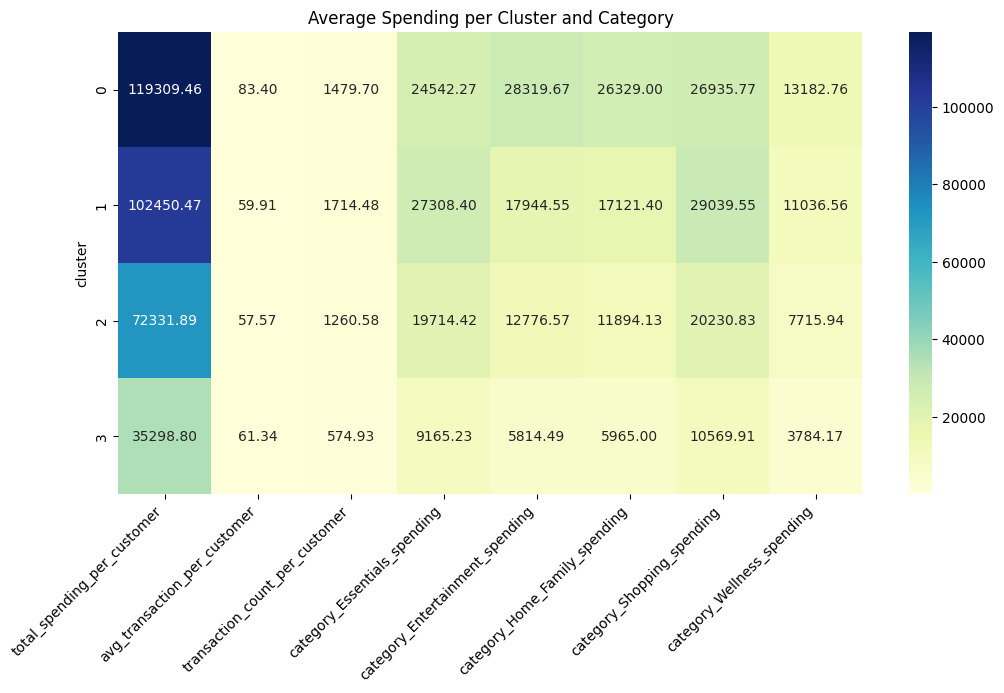

In [26]:
# Analyze the clusters: Calculate average values for each feature within each cluster
cluster_summary = df.groupby('cluster').agg({
    'total_spending_per_customer': 'mean',
    'avg_transaction_per_customer': 'mean',
    'transaction_count_per_customer': 'mean',
    'category_Essentials_spending': 'mean',
    'category_Entertainment_spending': 'mean',
    'category_Home_Family_spending': 'mean',
    'category_Shopping_spending': 'mean',
    'category_Wellness_spending': 'mean'
})

print(cluster_summary)

# Visualize cluster profiles
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Spending per Cluster and Category')
plt.xticks(rotation=45, ha='right')
plt.show()

> Results: The results revealed clear differences in spending behaviors among the clusters. Cluster 0 represented high spenders with a significant amount of spending across all categories, particularly in entertainment and shopping. Cluster 1 also exhibited high spending, but the average transaction per customer was lower than in Cluster 0, indicating more frequent but smaller purchases. Cluster 2 displayed moderate spending across categories, with a particular emphasis on essentials. Cluster 3 had the lowest spending levels and fewer transactions, primarily focusing on essentials. The heatmap effectively showcased these spending patterns, providing valuable insights for understanding and targeting different customer segments more effectively.

<hr>

### G.5 Centroid Analysis

> Rationale: The centroid analysis provides valuable insights into the characteristics of each cluster formed by the K-Means algorithm. By calculating the centroids, which represent the average position of data points in each cluster, we can interpret the core attributes of the different customer groups. Converting the centroids into a DataFrame makes it easy to interpret and compare the key features of the clusters, such as total spending, average transaction amount, and spending distribution across categories. This analysis is useful for understanding the typical behaviors and spending patterns associated with each cluster, enabling a data-driven approach to targeting and segmentation.

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_

# Convert centroids to DataFrame for easy interpretation
centroid_df = pd.DataFrame(centroids, columns=X.columns)  
print(centroid_df)

   total_spending_per_customer  avg_transaction_per_customer  \
0                     0.896610                      3.242846   
1                     0.472399                      0.103569   
2                    -0.285453                     -0.209571   
3                    -1.217290                      0.293623   

   transaction_count_per_customer  category_Entertainment_spending  \
0                        0.066621                         2.201205   
1                        0.394522                         0.611229   
2                       -0.239407                        -0.180759   
3                       -1.197032                        -1.247690   

   category_Essentials_spending  category_Home_Family_spending  \
0                      0.190201                       1.708929   
1                      0.441395                       0.473926   
2                     -0.248219                      -0.227201   
3                     -1.206198                      -1.022469  

> Results: The centroid analysis reveals distinct behavioral patterns among the four clusters. Cluster 0 shows high values across several spending categories, indicating "High Overall Spenders" who spend heavily in multiple areas. Cluster 1 demonstrates moderate spending, particularly in shopping and wellness, while Cluster 2 has negative values, reflecting "Moderate Spenders" with below-average expenditures. Cluster 3 exhibits the lowest spending values across all categories, identifying it as "Low-Income or Minimal Spenders." These insights allow us to understand each segment's profile, supporting tailored marketing strategies and focused resource allocation.

<hr>

### G.6 Cluster Labeling for Customer Segmentation

> Rationale: The rationale behind assigning descriptive labels to each cluster is to provide a more intuitive understanding of the customer segments identified in the clustering analysis. By analyzing the spending patterns and average values of different features for each cluster, meaningful labels such as "High Overall Spenders" or "Low-Income or Minimal Spenders" were assigned. This labeling makes the clusters more interpretable, allowing the marketing team to understand customer behavior better and effectively target specific segments with tailored marketing strategies.

In [28]:
# Define descriptive labels for each cluster and map them to the 'cluster' column in the DataFrame
cluster_labels = {
    0: "High Overall Spenders",
    1: "Frequent Shoppers on Essentials and Retail",
    2: "Moderate Spenders on Essentials and Family Needs",
    3: "Low-Income or Minimal Spenders"
}

# Apply the cluster labels to create a new 'cluster_label' column in the DataFrame
df['cluster_label'] = df['cluster'].map(cluster_labels)

> Results: The clusters have been labeled in a way that reflects their spending habits: Cluster 0 represents "High Overall Spenders" with the highest overall spending; Cluster 1 includes "Frequent Shoppers on Essentials and Retail"; Cluster 2 consists of "Moderate Spenders on Essentials and Family Needs"; and Cluster 3 represents "Low-Income or Minimal Spenders." Adding these labels to the DataFrame provides a more actionable framework for the marketing team, making it easier to identify which customer segments to target for personalized campaigns.

<hr>

### G.7 Visual Representation of Cluster Sizes and Percentages

> Rationale: The purpose of this visualization is to present the distribution of different customer segments based on their spending behavior by leveraging descriptive labels for each cluster. The cluster labels ("High Overall Spenders," "Frequent Shoppers on Essentials and Retail," etc.) provide more contextual insights into the unique characteristics of each group, making it easier to understand and communicate patterns. By calculating the total count and percentage of observations in each cluster, we aim to identify how each customer segment contributes to the overall population, which is crucial for effective market segmentation and targeting.

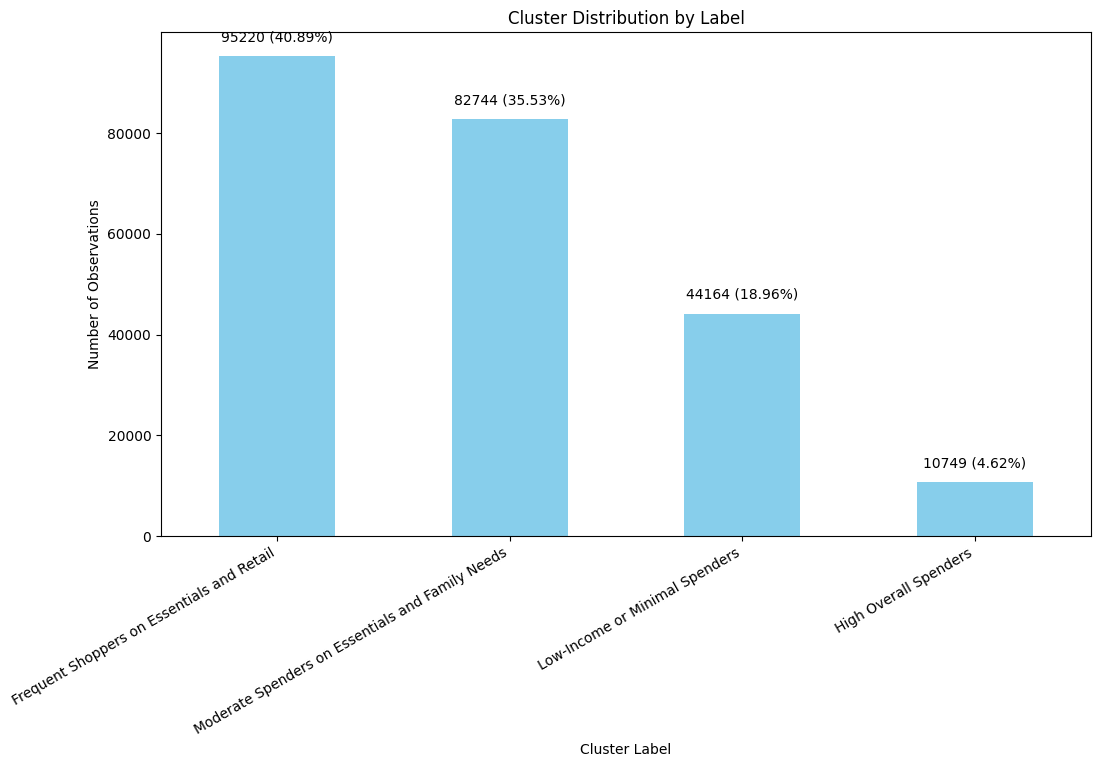

In [29]:
# Calculate total count and percentage for each cluster label
cluster_counts = df['cluster_label'].value_counts()
total_count = cluster_counts.sum()
cluster_percentages = (cluster_counts / total_count * 100).round(2)

# Plot cluster distribution using cluster labels
plt.figure(figsize=(12, 8))
ax = cluster_counts.plot(kind='bar', color='skyblue', title='Cluster Distribution by Label')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Observations')

# Annotate each bar with the count and percentage
for i, (count, pct) in enumerate(zip(cluster_counts, cluster_percentages)):
    ax.text(i, count + total_count * 0.01, f'{count} ({pct}%)', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')  
plt.subplots_adjust(bottom=0.25) 
plt.show()

> Results: The visualization highlights that "Frequent Shoppers on Essentials and Retail" make up the largest cluster, comprising 40.89% of the total observations, followed by "Moderate Spenders on Essentials and Family Needs" at 35.53%. The "Low-Income or Minimal Spenders" segment forms 18.96%, while "High Overall Spenders" are the smallest group, with only 4.62%. These insights reveal the varying proportions of each spending behavior, offering guidance for customized marketing strategies. Specifically, most customers fall into clusters with frequent spending on essentials, highlighting potential opportunities for targeted campaigns in those categories.

<hr>

### G.8 Distribution of Customer Spending by Cluster

> Rationale: The rationale behind creating a box plot of total spending per customer by cluster is to visually depict how spending behavior varies across different customer segments. This helps identify the range of spending among distinct customer groups—such as "High Overall Spenders" and "Low-Income or Minimal Spenders"—allowing for clear visualization of differences in financial behavior and spending capacity. By using labeled clusters, this plot also makes the customer segmentation more interpretable.

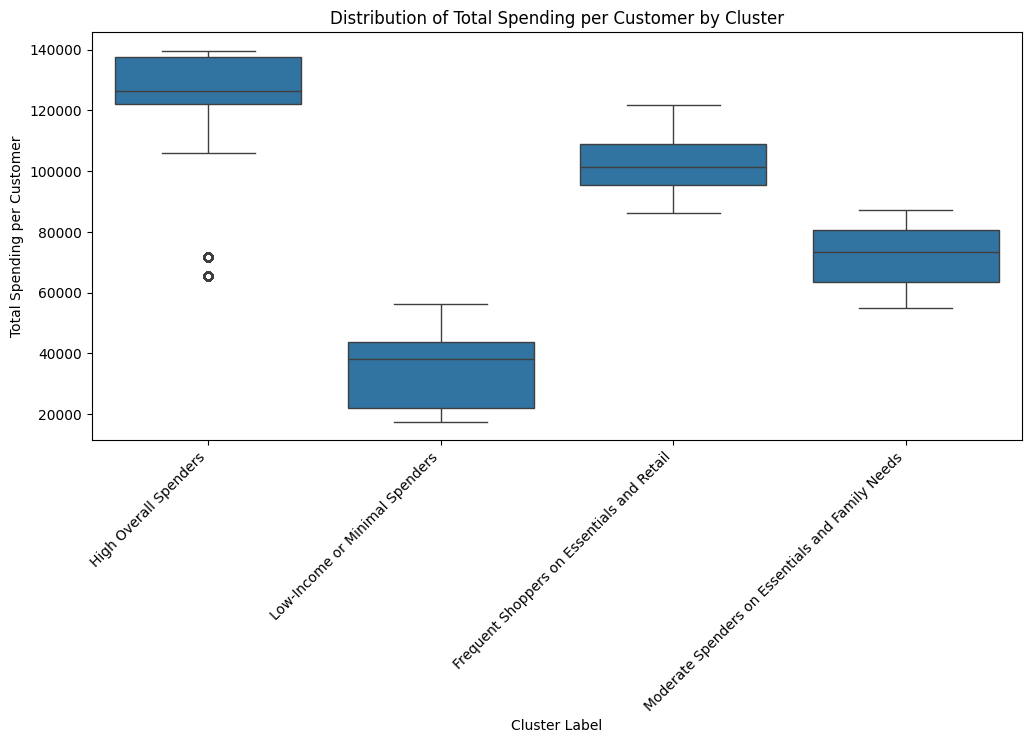

In [30]:
# Box plot for total spending per customer by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_label', y='total_spending_per_customer', data=df)
plt.xlabel('Cluster Label')
plt.ylabel('Total Spending per Customer')
plt.title('Distribution of Total Spending per Customer by Cluster')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.show()

> Results: The box plot reveals notable differences in spending behavior among the clusters. "High Overall Spenders" exhibit the highest median and the widest range of spending, with some outliers representing exceptionally high spending customers. On the other hand, "Low-Income or Minimal Spenders" show a significantly lower range of total spending, reflecting tighter budgets. Clusters like "Frequent Shoppers on Essentials and Retail" and "Moderate Spenders on Essentials and Family Needs" also display distinct spending patterns, highlighting differences in their typical financial engagement with the products or services. This visualization effectively captures the variation in spending behavior, providing actionable insights for tailored marketing strategies.

### G.9 Visualization of Average Spending Distribution per Cluster Using Stacked Bar Chart"

> Rationale: The rationale behind this visualization is to provide a comprehensive overview of spending behavior across different clusters in various categories. By joining the cluster summary with corresponding cluster labels, the bar chart highlights the average spending in categories such as Essentials, Entertainment, Home & Family, Shopping, and Wellness for each cluster. Using a stacked bar chart allows us to visually capture and compare spending habits of different customer groups across multiple categories at once. This approach facilitates understanding the proportion and distribution of spending by cluster, making it easier to identify trends and key differences among clusters.

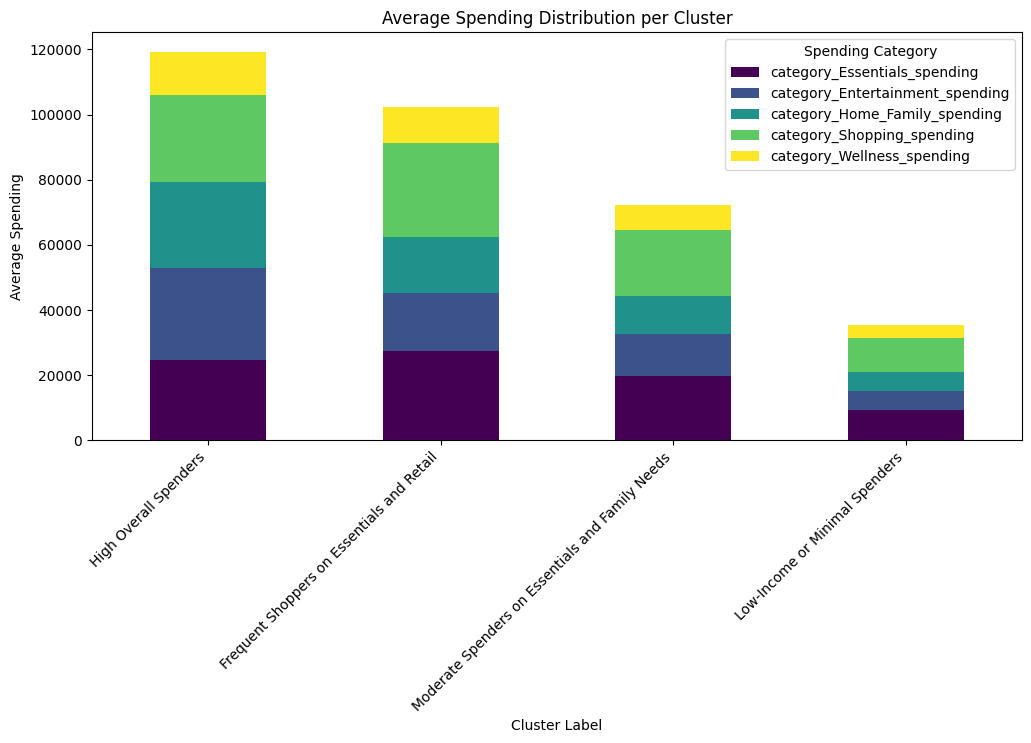

In [31]:
# Join the unique 'cluster' and 'cluster_label' mappings to the cluster_summary DataFrame for labeling
cluster_summary = cluster_summary.join(df[['cluster', 'cluster_label']].drop_duplicates().set_index('cluster'))

# Set 'cluster_label' as the index to label clusters with descriptive names
cluster_summary.set_index('cluster_label', inplace=True)

# Define the list of spending categories to plot
categories = [
    'category_Essentials_spending',
    'category_Entertainment_spending',
    'category_Home_Family_spending',
    'category_Shopping_spending',
    'category_Wellness_spending'
]

# Plotting with cluster labels on the x-axis
cluster_summary[categories].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Average Spending')
plt.title('Average Spending Distribution per Cluster')
plt.legend(title='Spending Category')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.show()

> Results: The results of the stacked bar chart indicate significant variations in spending patterns between different clusters. The "High Overall Spenders" cluster has the highest average spending across all categories, particularly in essentials and shopping. "Frequent Shoppers on Essentials and Retail" also demonstrate higher spending, especially on essential items. "Moderate Spenders on Essentials and Family Needs" show a more balanced spending pattern across categories, while the "Low-income or Minimal Spenders" group has comparatively lower spending in all categories. These results can help the marketing team identify customer segments that may benefit from targeted campaigns tailored to their spending preferences, thereby improving the effectiveness of marketing efforts.

<hr>

### G.10 Business Impact from Current Model Performance

In [32]:
#

> Results: The clustering model provides valuable insights that directly support the bank’s marketing efforts by enabling the delivery of personalized marketing campaigns to distinct customer segments. Each of the four clusters offers unique opportunities for targeted marketing. "High Overall Spenders" (Cluster 0) can be engaged with premium or exclusive offers, loyalty rewards, and high-end promotions, as their significant expenditure suggests a high potential for luxury or premium services. "Frequent Shoppers on Essentials and Retail" (Cluster 1) are ideal for regular discounts and promotions on essential goods, as their frequent purchases in these categories suggest they would respond well to offers that lower their everyday costs. "Moderate Spenders on Essentials and Family Needs" (Cluster 2) represent a balanced customer segment with moderate spending patterns. This group could benefit from family-oriented promotions or bundled services that cater to household and family expenses, potentially encouraging loyalty. Lastly, "Low-Income or Minimal Spenders" (Cluster 3), who spend primarily on essentials, may respond positively to budget-friendly offers or financial products that help manage and optimize limited spending. By tailoring campaigns to each segment, the bank can improve marketing efficiency, enhance customer satisfaction, and foster stronger customer relationships. This targeted approach is expected to increase conversion rates, optimize resource allocation, and ultimately generate greater value for both the bank and its customers.

<hr>

## H. Final Outcomes

> Key Learnings: The clustering analysis showed that customers can be categorized into unique groups according to their spending habits, including high spenders, essential product purchasers, and family-focused consumers. This segmentation offers insights into the varied preferences among customers, emphasizing the value of clustering for directing focused marketing approaches. By recognizing distinct spending patterns, the bank can now engage with customers more accurately, making sure that marketing strategies connect with every segment.

> Recommendations: It is advisable for the marketing team to utilize these clusters to create customized marketing campaigns. For example, premium customers could receive special deals or loyalty incentives, while individuals prioritizing necessary purchases might gain from consistent discounts on everyday products. Moreover, it's recommended to regularly assess and refresh these clusters to capture changes in customer behavior. Executing cluster-focused campaigns is anticipated to boost customer satisfaction and loyalty, improving overall marketing efficiency and aiding the bank’s growth goals.

<hr>